In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## exponential decay thing

In [2]:
# LOAD WEIGHTS 

#nationality one (years 1-10 ago):
weights_nat = [0.437390468, 0.3147180797, 0.2113874761, 0.1671721936, 0.1195184226, 
               0.09175194986, 0.06790416843, 0.0625860134, 0.043939719, 0.04160091152]

#judge one (blocks of 10 decisions, from most recent to most distant):
weights_judge = [0.2519465138, 0.1728417828, 0.1613653226, 0.1041727178, 0.1014232636, 
                 0.1002812281, 0.09217799532, 0.06384049604, 0.05347739494, 0.05115017758]

Text(0,0.5,'judge weights')

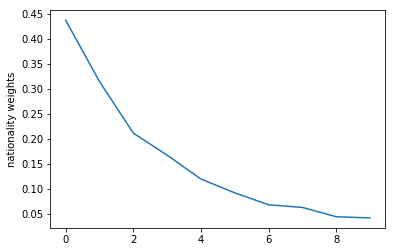

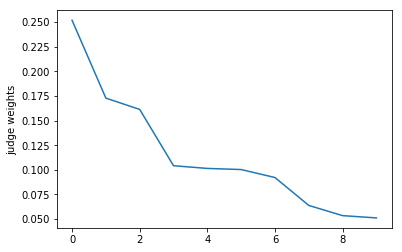

In [3]:
plt.figure()
plt.plot(weights_nat)
plt.ylabel('nationality weights')

plt.figure()
plt.plot(weights_judge)
plt.ylabel('judge weights')

In [4]:
def fun_nat(params):
    # returns square loss between negative exponential and actual data
    
    x = np.arange(1,11)
    x.astype('float64')
    yhat = np.exp((-params[0]*(params[1]+x)))
    
    return np.sum((yhat-weights_nat)**2)

def fun_judge(params):
    # returns square loss between negative exponential and actual data
    
    x = np.arange(1,11)
    x.astype('float64')
    yhat = np.exp((-params[0]*(params[1]+x)))
    
    return np.sum((yhat-weights_judge)**2)

array([0.1874163 , 6.82061061])

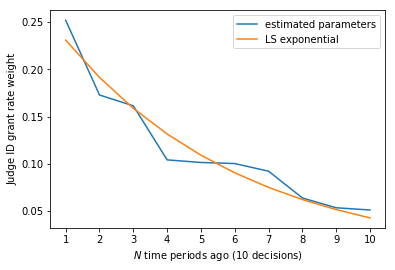

In [17]:
# get judge weights
x0 = [1.,1.]
params_judge = minimize(fun_judge,x0)

# plot prediction function
xx = np.arange(1,11)
plt.figure()
plt.plot(xx,weights_judge)
plt.plot(xx,np.exp((-params_judge.x[0]*(params_judge.x[1]+xx))))

plt.xticks(xx)
plt.xlabel('$N$ time periods ago (10 decisions)')
plt.ylabel('Judge ID grant rate weight')
plt.legend(['estimated parameters','LS exponential'])

# print weights
params_judge.x

array([0.31070808, 1.72349708])

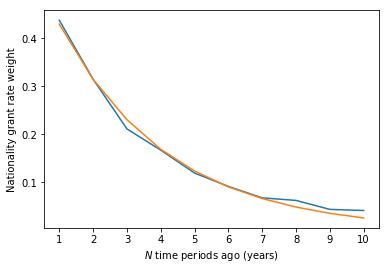

In [16]:
# get nationality weights
x0 = [1.,1.]
params_nat = minimize(fun_nat,x0)

# plot prediction function
xx = np.arange(1,11)
plt.figure()
plt.plot(xx,weights_nat)
plt.plot(xx,np.exp((-params_nat.x[0]*(params_nat.x[1]+xx))))

plt.xticks(xx)
plt.xlabel('$N$ time periods ago (years)')
plt.ylabel('Nationality grant rate weight')
# plt.legend(['estimated parameters','LS exponential'])

# show weights
params_nat.x